In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Boston.csv', )
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
## Independent Features and Dependent Features
X = df.iloc[:,0:13]
y = df['medv']

In [5]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [7]:
## Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
## Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
# scaler.inverse_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
## Implementation of Ridge Regression

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # Helps in cross validation

In [15]:
ridge_regression = Ridge()
ridge_regression

Ridge()

In [17]:
paramenters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV = GridSearchCV(ridge_regression, paramenters, scoring='neg_mean_squared_error', cv=5)
ridgeCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [18]:
print(ridgeCV.best_params_)

{'alpha': 10}


In [19]:
print(ridgeCV.best_score_)

-25.80722882229147


In [21]:
ridge_pred = ridgeCV.predict(X_test)
ridge_pred

array([28.4134954 , 36.07453577, 16.17164021, 25.30868069, 18.80946202,
       23.13610281, 17.61393934, 14.38360489, 22.53627218, 20.76952254,
       24.66003705, 18.89604804, -6.22947589, 21.96166951, 19.30921109,
       25.85720057, 19.58612918,  5.69547314, 39.88738352, 17.56727832,
       27.14663855, 29.65696101, 11.44350098, 24.11125603, 17.95711934,
       15.57428959, 23.12734966, 14.75101298, 22.43522694, 19.54923792,
       21.98108708, 25.21097849, 25.13554702, 18.36676527, 16.33620525,
       17.94437716, 30.95709893, 20.30635001, 24.04235565, 24.83020506,
       14.25723626, 31.13073416, 41.6638407 , 17.98419612, 27.01273195,
       17.01890841, 14.15348536, 26.05436703, 19.99814799, 30.25499968,
       21.54267256, 33.72177452, 16.00637844, 26.24691138, 38.87355943,
       22.75281202, 18.90407683, 32.36945892, 24.89966226, 13.35872194,
       22.91082359, 30.60280217, 31.24730093, 16.556512  , 22.02834711,
       16.75198858, 20.20417162, 26.06542713, 30.62889806, 12.09

E:\Projects\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


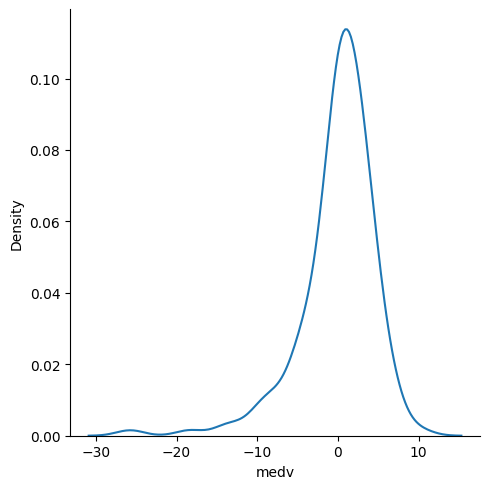

In [22]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind='kde')

In [24]:
from sklearn.metrics import r2_score
score = r2_score(ridge_pred, y_test)
score

0.6468557055633651

## Lasso Regeression

In [25]:
from sklearn.linear_model import Lasso # used for automatic feature selection

In [26]:
lasso = Lasso()
lasso

Lasso()

In [27]:
paramenters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCV = GridSearchCV(lasso, paramenters, scoring='neg_mean_squared_error', cv=5)
lassoCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [28]:
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 1}
-31.153603752119004


In [29]:
lasso_pred = lassoCV.predict(X_test)
lasso_pred

array([26.12212011, 30.64819603, 17.74859418, 25.19460935, 19.2946692 ,
       22.82279099, 18.29163625, 14.64075609, 21.39330664, 20.41184791,
       20.63763155, 21.04309429,  1.20212245, 22.48770149, 20.32863075,
       24.82509724, 18.13265187,  6.81250853, 36.09245901, 18.45054869,
       25.64506153, 26.80170403, 13.73714037, 24.01576341, 18.81760059,
       15.4264936 , 22.86865424, 19.00799481, 19.78638284, 19.64740851,
       19.93060152, 25.47637139, 25.2188929 , 19.46825782, 15.87043757,
       20.50660407, 31.02198968, 21.6519024 , 21.52470923, 24.76908959,
       14.39002311, 27.57471172, 36.56725739, 19.58680457, 25.573017  ,
       17.1872521 , 15.93361988, 25.87675365, 19.35466887, 29.59665087,
       23.11788464, 31.50427155, 17.53234012, 25.85419661, 35.21484659,
       22.89869915, 19.39011084, 29.39749368, 24.66544216, 16.65559649,
       25.47892536, 30.80725782, 28.94063044, 18.30751821, 27.60126279,
       14.37892853, 20.05681263, 25.59068988, 28.35700042, 16.00

E:\Projects\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


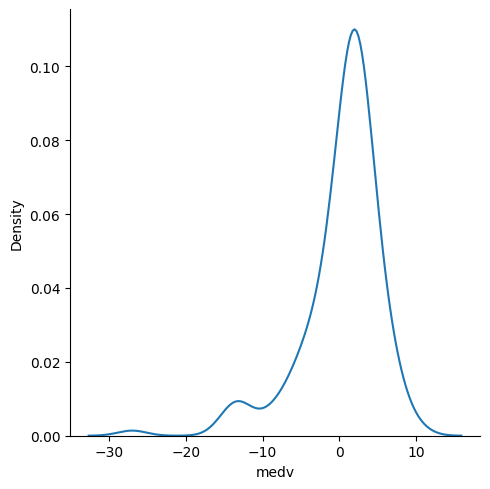

In [30]:
sns.displot(lasso_pred-y_test, kind='kde')